In [ ]:
import numpy as np
import timeit
import numexpr as ne
from numba import njit
import matplotlib.pyplot as plt

Pulse sequence Bernstein book and https://core.ac.uk/download/pdf/210856108.pdf

In [ ]:
import numpy as np

def ssfp_fid(M_0, theta, E_1, E_2):
    # Convert theta from degrees to radians if necessary
    theta_rad = np.radians(theta) 
    
    # Compute p and q based on the new definitions
    p = 1 - E_1 * np.cos(theta_rad) - E_2**2 * (E_1 - np.cos(theta_rad))
    q = E_2 * (1 - E_1) * (1 + np.cos(theta_rad))
    
    # Compute the SSFP_FID expression
    result = (M_0 * np.tan(theta_rad / 2) * 
              (1 - ((E_1 - np.cos(theta_rad)) * (1 - E_2**2)) / np.sqrt(p**2 - q**2)))
    
    return result

# Example usage
M_0 = 10000.0  # example value
theta = 50 # in degrees
TR = 40
T2 = 71 # tissue
T1 = 1122 # tissue
E_1 = np.exp(-TR/T1)  
E_2 = np.exp(-TR/T2) 


result = ssfp_fid(M_0, theta, E_1, E_2)
print("SSFP_FID:", result)

In [ ]:
# Example values
M_0 = 10000 #10000.0
T2 = 71 # tissue
T1 = 1122 # tissue

# Plot for variable theta (0-180 degrees) with fixed TR = 100
theta_values = np.linspace(0, 180, 180)
TR_fixed = 400
E_1_fixed = np.exp(-TR_fixed / T1)
E_2_fixed = np.exp(-TR_fixed / T2)
ssfp_fid_values_theta = [ssfp_fid(M_0, theta, E_1_fixed, E_2_fixed) for theta in theta_values]



plt.figure(figsize=(12, 6))
plt.plot(theta_values, ssfp_fid_values_theta)
plt.xlabel('Theta (degrees)')
plt.ylabel('SSFP_FID')
plt.title('SSFP_FID vs Theta (TR = 100)')
plt.grid(True)
plt.show()


# Plot for variable TR (4 to 200) with fixed theta = 80
TR_values = np.linspace(4, 200, 197)
theta_fixed = 80
ssfp_fid_values_TR = [ssfp_fid(M_0, theta_fixed, np.exp(-TR / T1), np.exp(-TR / T2)) for TR in TR_values]

plt.figure(figsize=(12, 6))
plt.plot(TR_values, ssfp_fid_values_TR)
plt.xlabel('TR')
plt.ylabel('SSFP_FID')
plt.title('SSFP_FID vs TR (Theta = 80 degrees)')
plt.grid(True)
plt.show()

thet20 = theta_values[:5]
print(theta_values[np.argmax(ssfp_fid_values_theta[:5])])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example values
M_0 = 1  # 10000.0

# Define the sets of T1 and T2 values
T1_T2_pairs = [
    (2000, 400),
    (2000, 200),
    (1000, 100),
    (1000, 50)
]

# Initialize lists to store results for plotting
theta_results = []
TR_results = []

# Loop through each pair of T1 and T2 values
for T1, T2 in T1_T2_pairs:
    # Plot for variable theta (0-180 degrees) with fixed TR = 100
    theta_values = np.linspace(0, 180, 180)
    TR_fixed = 40
    E_1_fixed = np.exp(-TR_fixed / T1)
    E_2_fixed = np.exp(-TR_fixed / T2)
    ssfp_fid_values_theta = [ssfp_fid(M_0, theta, E_1_fixed, E_2_fixed) for theta in theta_values]
    theta_results.append((theta_values, ssfp_fid_values_theta, T1, T2))

# Plot all theta results on the same graph
plt.figure(figsize=(6, 6))
for theta_values, ssfp_fid_values_theta, T1, T2 in theta_results:
    plt.plot(theta_values[:179], ssfp_fid_values_theta[:179], label=f'T1 = {T1}, T2 = {T2}')
plt.xlabel('Flip Angle (degrees)')
plt.ylabel('SSFP_FID')
plt.title(f'SSFP_FID vs Flip Angle (TR = {TR_fixed}ms)')
plt.legend()
plt.grid(True)
plt.xlim([0,180])
plt.ylim([0,0.2])
plt.show()



In [ ]:
# Define the range of theta values
theta_values = np.linspace(0, 180, 100)  # Example range from 0 to 180 degrees

# Define the TR values
TR_values = [25, 50, 100, 150, 200]
M_0 = 1#10000.0
T2 = 71 # tissue
T1 = 1122 # tissue

for TR in TR_values:
    E_1 = np.exp(-TR/T1)  
    E_2 = np.exp(-TR/T2) 
    ssfid_fid_values = []
    for theta in theta_values:
        value = ssfp_fid(M_0, theta, E_1, E_2)
        ssfid_fid_values.append(value)


    plt.plot(theta_values, ssfid_fid_values, label=f'TR = {TR} ms')

plt.xlabel('Theta (degrees)')
plt.ylabel('ssfid_fid')
plt.title('SSFP_FID vs Flip Angle, T1 = 1122ms, T2 = 71ms')
plt.legend()
plt.grid(True)
plt.show()

Test the simulated signal mean versus a theoretical signal

In [1]:
from testhelperfunctions import ssfp_fid, calcSteadyStateMean
import sys
import numpy as np

sys.path.insert(0, "./functions/")
from DictionaryGeneratorFast import DictionaryGeneratorFast

# create a plot for a test theoretical TR, T1 and T2
M_0 = 10000 #10000.0
T2 = 71 # tissue
T1 = 1122 # tissue
noRepetitions = 2000
TR = 400

# Theoretical SS for variable theta (0-180 degrees) 
theta_values = np.linspace(0, 180, 180)
E_1_fixed = np.exp(-TR/ T1)
E_2_fixed = np.exp(-TR / T2)
ssfp_fid_theoretical= [ssfp_fid(M_0, theta, E_1_fixed, E_2_fixed) for theta in theta_values]

# simulation parameters
readTRFA = False
samples = 1
dictionaryId = 'Discard'
instance = 25
noise = 1 # no noise
multi = 100
invSwitch = False
CSFnullswitch = False
sliceProfileSwitch = True # the original FISP slice profile
sequence = 'FISP'
t1Array = np.array([T1,T1]) # single compartment model
t2Array = np.array([T2,T2]) # single compartment model
t2StarArray = np.array([50,21])
res = 0 # not important in single compartment with no exchange
vb = 1 # not important in single compartment with no exchange
noOfIsochromatsX = 1000
noOfIsochromatsY = 1
noOfIsochromatsZ = 10
noOfRepetitions = 2000

simulated_signal_mean_steady_state = np.zeros(np.size(ssfp_fid_theoretical))
thetaidx = -1
# iterate through each theta value 
for theta in theta_values:
    thetaidx += 1
    faArray = np.ones(noRepetitions)*theta
    trArray = np.ones(noRepetitions)*TR

    # simulate the signal
    simulated_generator = DictionaryGeneratorFast(t1Array, t2Array, t2StarArray, noOfIsochromatsX,\
                noOfIsochromatsY, noOfIsochromatsZ, noOfRepetitions, noise, vb/10, res,\
                multi/100, invSwitch, CSFnullswitch, sliceProfileSwitch, samples, dictionaryId, sequence, instance, readTRFA, trArray, faArray)
    simulated_signal = simulated_generator.MRFSGRE()[:,0]
    # compute the steady state mean
    simulated_signal_mean_steady_state[thetaidx] = calcSteadyStateMean(simulated_signal, gradient_threshold=0.1, plot = False, print_info = False)
    

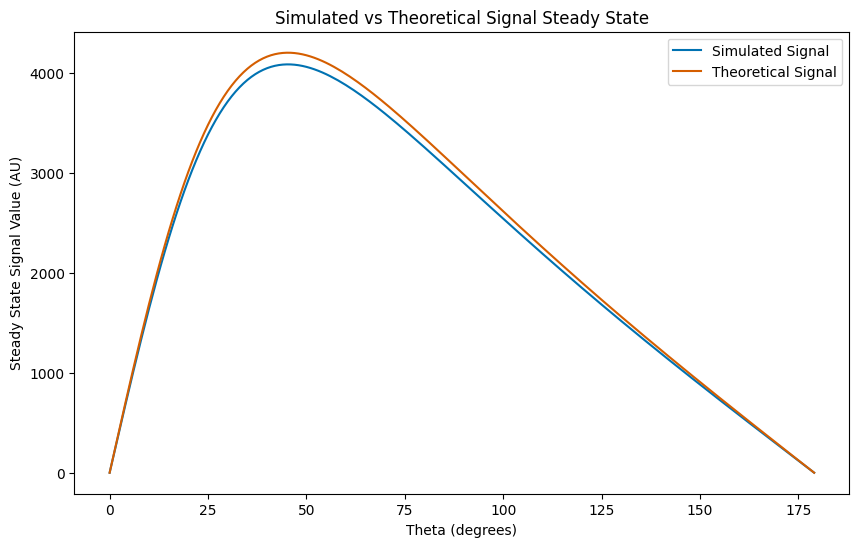

In [2]:
import matplotlib.pyplot as plt

# Plot the signals
plt.figure(figsize=(10, 6))
plt.plot(simulated_signal_mean_steady_state, linestyle='-', color='#0072B2', label='Simulated Signal')  # Blue color
plt.plot(ssfp_fid_theoretical, linestyle='-', color='#D55E00', label='Theoretical Signal')  # Orange color

# Add labels and title
plt.xlabel('Theta (degrees)')
plt.ylabel('Steady State Signal Value (AU)')
plt.title('Simulated vs Theoretical Signal Steady State')
plt.legend()
# Show the plot
plt.show()


In [3]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

rmse = root_mean_squared_error(ssfp_fid_theoretical, simulated_signal_mean_steady_state)
r2 = r2_score(ssfp_fid_theoretical, simulated_signal_mean_steady_state)

In [4]:
rmse

75.09718577350665

In [5]:
r2

0.9968200219905032